In [1]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.9 MB/s eta 0:00:00


In [2]:
# download the dataset, a dataset of ailine-tweets, this is a sentiment-analysis dataset
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-04-07 22:38:08--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  4.88MB/s    in 0.7s    

2023-04-07 22:38:09 (4.88 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [3]:
# Import the necisarry libarys and methods
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
# load in our data
df_ = pd.read_csv('AirlineTweets.csv')

In [5]:
# Inspect the dataset, we are intressed in the colums airline sentiment and text(label && tweet)
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
# Select the colums we need
df = df_[['airline_sentiment', 'text']].copy()

In [7]:
# Inspect the "new" dataset
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

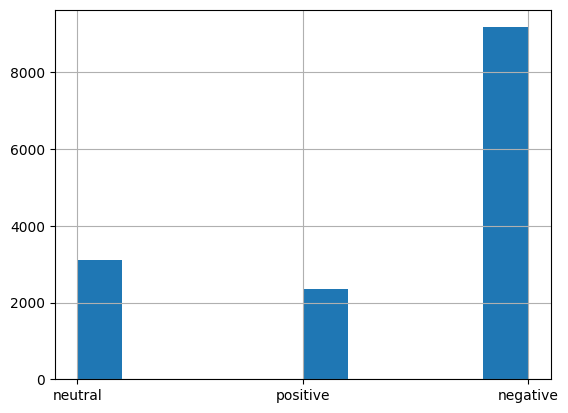

In [8]:
# Check a histogram of the labels, this is an imbalanced dataset
df['airline_sentiment'].hist()

In [9]:
# Map the labels to integers(Req. for neural networks)
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
# Save the dataframe to a new csv file
df2 = df[['text', 'target']]
df2.columns = ['sentence', 'label']
df2.to_csv('data.csv', index=None)

In [11]:
# Run the head command on our new csv
!head data.csv

sentence,label
@VirginAmerica What @dhepburn said.,2
@VirginAmerica plus you've added commercials to the experience... tacky.,1
@VirginAmerica I didn't today... Must mean I need to take another trip!,2
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
@VirginAmerica and it's a really big bad thing about it,0
"@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA",0
"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1
"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",2


In [12]:
# To be able to load in the csv as a hugging-face dataset
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files='data.csv')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-37c6dbe91fde8264/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Print out our dataset object
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [14]:
# Split the data into train and test set
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)

In [15]:
# Print out the split object to see what we got back
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

In [16]:
# If you have multiple csv files
# load_dataset('csv', data_files=['file1.csv', 'file2,csv'])

In [17]:
# If you already have a train-test split:
#load dataset(
#    'csv',
#    data_files={'train': ['train1.csv', 'train2.csv'],
#                'test': 'test.csv'
#                }
#)

In [18]:
# Define the checkpoint for the script, we can try regular bert aswell
checkpoint = 'distilbert-base-cased'

In [19]:
# Import auotokenizer class
from transformers import AutoTokenizer

In [20]:
# Pass in our checkpoint to get our tokenizer object
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [21]:
# Define a tokenizer function, this is truncation, not padding(wich will be handled automatically)
def tokenize_fn(batch):
  return tokenizer(batch['sentence'], truncation=True)

In [22]:
# Appplay tokenized function to our train test split
tokenized_datasets = split.map(tokenize_fn, batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

In [23]:
# Import classses
from transformers import AutoModelForSequenceClassification, \
  Trainer, TrainingArguments

In [24]:
# Load the model from the checkpoint
model = AutoModelForSequenceClassification.from_pretrained(
    checkpoint, num_labels=3
)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier

In [25]:
# Install torchinfo so that we can call the summary method on our model
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Import the summary method
from torchinfo import summary

In [27]:
# Run summary method onour model, around 66 million parameters, and they're all trainable
summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

In [28]:
# Create the training arguments object
training_args = TrainingArguments(
    output_dir='trainig_dir',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
)

In [29]:
# Defint the compute metrics function
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average='macro')
  return {'accuracy': acc, 'f1': f1}

In [30]:
# Build our trainer object
#from transformers import DataCollatorForTokenClassification
#data_collator = DataCollatorForTokenClassification(tokenizer)
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    #data_collator=data_collator,   
    compute_metrics=compute_metrics,
)

In [39]:
# start the training process, the model is saved after each epoch so dont worry about overfitting
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.097100,0.638205,0.839936,0.786220
2,0.104300,0.638205,0.839936,0.786220
3,0.093000,0.638205,0.839936,0.786220


TrainOutput(global_step=1923, training_loss=0.0971713331423882, metrics={'train_runtime': 184.7746, 'train_samples_per_second': 166.386, 'train_steps_per_second': 10.407, 'total_flos': 387778317477552.0, 'train_loss': 0.0971713331423882, 'epoch': 3.0})

In [43]:
# Check the saved training data, three checkpoint with the runs up to the point
!ls trainig_dir

checkpoint-1282  checkpoint-1923  checkpoint-641  runs


In [41]:
# Import the pipeline function
from transformers import pipeline

In [44]:
# Instanciate a pipeline, task is text classification
savedmodel = pipeline('text-classification',
                      model='trainig_dir/checkpoint-1282',
                      device=0)

In [45]:
# Remind ourselves how to acess the test set
split['test']

Dataset({
    features: ['sentence', 'label'],
    num_rows: 4392
})

In [46]:
# Run the test set through our savedmodel to get the test predictions
test_pred = savedmodel(split['test']['sentence'])

In [47]:
# Pint out the predictions to remind ourselves of the format
test_pred

[{'label': 'LABEL_1', 'score': 0.9762486815452576},
 {'label': 'LABEL_1', 'score': 0.9867706298828125},
 {'label': 'LABEL_1', 'score': 0.8687817454338074},
 {'label': 'LABEL_1', 'score': 0.9789083003997803},
 {'label': 'LABEL_2', 'score': 0.9696556329727173},
 {'label': 'LABEL_0', 'score': 0.9963364601135254},
 {'label': 'LABEL_2', 'score': 0.9812763929367065},
 {'label': 'LABEL_2', 'score': 0.980933427810669},
 {'label': 'LABEL_1', 'score': 0.8415634036064148},
 {'label': 'LABEL_0', 'score': 0.9974011182785034},
 {'label': 'LABEL_0', 'score': 0.9959293007850647},
 {'label': 'LABEL_0', 'score': 0.9974598288536072},
 {'label': 'LABEL_1', 'score': 0.991970419883728},
 {'label': 'LABEL_0', 'score': 0.9968706965446472},
 {'label': 'LABEL_2', 'score': 0.9968641400337219},
 {'label': 'LABEL_2', 'score': 0.8565884232521057},
 {'label': 'LABEL_1', 'score': 0.8997644186019897},
 {'label': 'LABEL_0', 'score': 0.9969598054885864},
 {'label': 'LABEL_0', 'score': 0.9959604144096375},
 {'label': 'LA

In [49]:
# Convert the dict above to a list of int labels
def get_label(d):
  return int(d['label'].split('_')[1])

test_pred = [get_label(d) for d in test_pred]

In [50]:
# Check the accuracy of our predictions, should match the 2nd epoch froma above
print("acc", accuracy_score(split['test']['label'], test_pred))

acc 0.839936247723133


In [52]:
# Check th f1 score
print("f1:", f1_score(split['test']['label'], test_pred, average='macro'))

f1: 0.7862197768205906


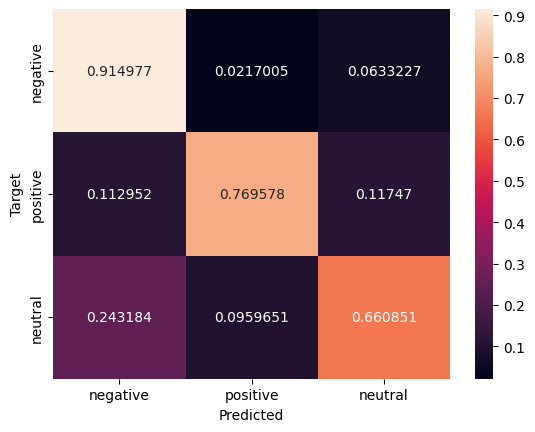

In [56]:
# Plot the cofusion matrix for our trained model on the test set
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

cm = confusion_matrix(split['test']['label'], test_pred, normalize='true')
plot_cm(cm)